In [2]:
library(readxl)
data <- read_excel("3-15.xlsx", sheet = 1)
head(data)

用户,X,Y
<dbl>,<dbl>,<dbl>
1,679,0.79
2,292,0.44
3,1012,0.56
4,493,0.79
5,582,2.70
6,1156,3.64


第（1）问

In [3]:
model <- lm(data[[3]] ~ data[[2]], data = data)
summary(model)


Call:
lm(formula = data[[3]] ~ data[[2]], data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0911 -0.8147 -0.1965  1.2446  3.2006 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.7880079  0.4499583  -1.751   0.0859 .  
data[[2]]    0.0036186  0.0003376  10.719 1.15e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.609 on 51 degrees of freedom
Multiple R-squared:  0.6926,	Adjusted R-squared:  0.6866 
F-statistic: 114.9 on 1 and 51 DF,  p-value: 1.146e-14


第（2）问

In [4]:
fitted_values <- fitted(model)          # 拟合值 yi_hat
stud_residuals <- rstudent(model)       # 学生化残差

In [35]:
png("fitted_values_vs_studentized_residuals2.png", width = 800, height = 600)

plot(fitted_values, stud_residuals,
     xlab = expression(hat(y)[i]), 
     ylab = "Studentized Residuals",
     main = "Fitted Values vs. Studentized Residuals")
abline(h = 2, col = "black", lty = 2) 
abline(h = -2, col = "black", lty = 2)
abline(h = 0, col = "red", lty = 2)
# 添加水平线
dev.off()


png 
  2

第（3）问

In [7]:
data$V4 <- sqrt(data[[3]])
head(data)

用户,X,Y,V4
<dbl>,<dbl>,<dbl>,<dbl>
1,679,0.79,0.8888194
2,292,0.44,0.6633250
3,1012,0.56,0.7483315
4,493,0.79,0.8888194
5,582,2.70,1.6431677
6,1156,3.64,1.9078784


In [8]:
model2 <- lm(data[[4]] ~ data[[2]], data = data)
summary(model2)


Call:
lm(formula = data[[4]] ~ data[[2]], data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.38013 -0.31045 -0.02535  0.26631  0.82191 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.896e-01  1.310e-01   4.502 3.94e-05 ***
data[[2]]   9.396e-04  9.826e-05   9.562 5.81e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4683 on 51 degrees of freedom
Multiple R-squared:  0.6419,	Adjusted R-squared:  0.6349 
F-statistic: 91.43 on 1 and 51 DF,  p-value: 5.811e-13


In [9]:
fitted_values2 <- fitted(model2)          # 拟合值 yi_hat
stud_residuals2 <- rstudent(model2)       # 学生化残差

In [37]:
png("fitted_values_vs_studentized_residuals4.png", width = 800, height = 600)

plot(fitted_values2, stud_residuals2,
     xlab = expression(hat(y)[i]), 
     ylab = "Studentized Residuals",
     main = "Fitted Values vs. Studentized Residuals")
abline(h = 2, col = "black", lty = 2) 
abline(h = -2, col = "black", lty = 2)
abline(h = 0, col = "red", lty = 2)
# 添加水平线
dev.off()


png 
  2

第（4）问

In [14]:
library(MASS)
model <- lm(data[[3]] ~ data[[2]], data = data)

最大对数似然值对应的 lambda = 0.53 


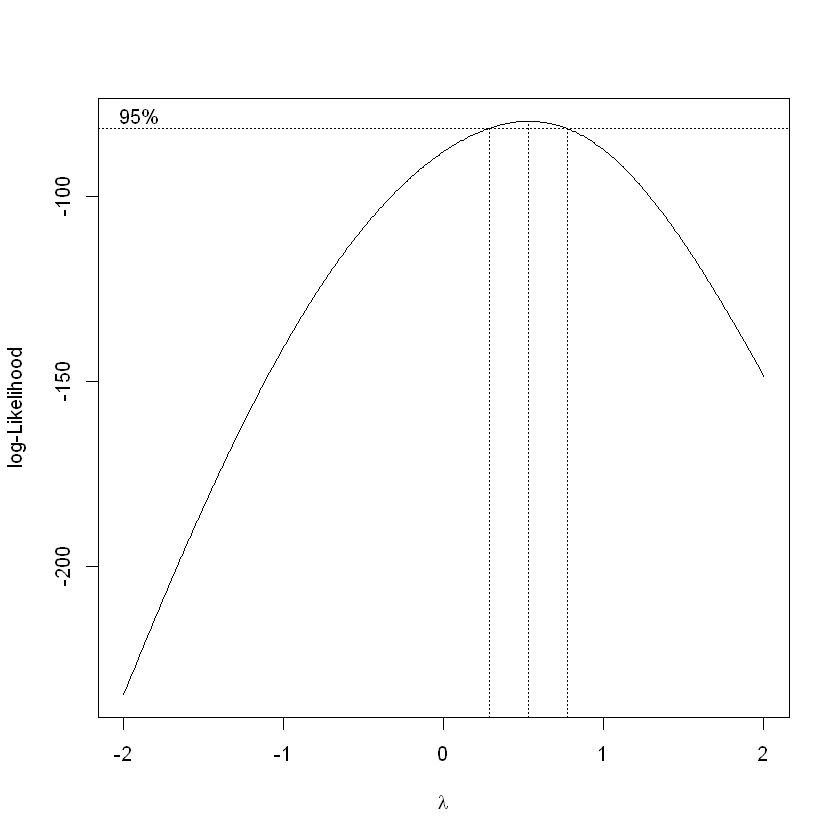

In [17]:
# 获取 λ 值和对应的对数似然值
bc <- boxcox(model, lambda = seq(-2, 2, by = 0.01))
lambda_values <- bc$x          # λ 值
log_likelihoods <- bc$y        # 对应的对数似然值

best_lambda <- lambda_values[which.max(log_likelihoods)]

# 输出结果
cat("最大对数似然值对应的 lambda =", best_lambda, "\n")

In [18]:
# 将 λ 值和对数似然值组合成数据框
lambda_loglik_table <- data.frame(
  Lambda = lambda_values,
  Log_Likelihood = log_likelihoods
)

# 查看表格
print(lambda_loglik_table)

    Lambda Log_Likelihood
1    -2.00     -234.59876
2    -1.99     -233.52916
3    -1.98     -232.46136
4    -1.97     -231.39538
5    -1.96     -230.33123
6    -1.95     -229.26895
7    -1.94     -228.20855
8    -1.93     -227.15006
9    -1.92     -226.09349
10   -1.91     -225.03887
11   -1.90     -223.98621
12   -1.89     -222.93555
13   -1.88     -221.88691
14   -1.87     -220.84030
15   -1.86     -219.79575
16   -1.85     -218.75328
17   -1.84     -217.71293
18   -1.83     -216.67470
19   -1.82     -215.63863
20   -1.81     -214.60474
21   -1.80     -213.57305
22   -1.79     -212.54359
23   -1.78     -211.51639
24   -1.77     -210.49146
25   -1.76     -209.46884
26   -1.75     -208.44855
27   -1.74     -207.43062
28   -1.73     -206.41506
29   -1.72     -205.40192
30   -1.71     -204.39121
31   -1.70     -203.38296
32   -1.69     -202.37720
33   -1.68     -201.37396
34   -1.67     -200.37326
35   -1.66     -199.37513
36   -1.65     -198.37960
37   -1.64     -197.38670
38   -1.63  

In [32]:
model3 <- lm(data[[3]]^0.53 ~ data[[2]], data = data)
summary(model3)


Call:
lm(formula = data[[3]]^0.53 ~ data[[2]], data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48940 -0.32589 -0.03407  0.28405  0.90489 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5483472  0.1420689   3.860 0.000321 ***
data[[2]]   0.0010311  0.0001066   9.674 3.95e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.508 on 51 degrees of freedom
Multiple R-squared:  0.6473,	Adjusted R-squared:  0.6403 
F-statistic: 93.58 on 1 and 51 DF,  p-value: 3.948e-13


第（5）问

In [23]:
cooks_d <- cooks.distance(model)
data$Cooks_D <- cooks_d

print(cooks_d)

           1            2            3            4            5            6 
4.606011e-03 3.289540e-04 2.136276e-02 3.413152e-04 1.328081e-02 2.270248e-04 
           7            8            9           10           11           12 
1.471564e-02 8.098912e-02 1.781018e-02 1.700863e-04 1.924984e-05 1.539152e-04 
          13           14           15           16           17           18 
9.589892e-03 5.071242e-02 2.378132e-02 4.046469e-04 1.055688e-03 1.484611e-02 
          19           20           21           22           23           24 
6.988125e-03 3.229222e-03 2.735159e-03 3.017400e-03 1.206783e-03 2.079116e-02 
          25           26           27           28           29           30 
2.798818e-02 7.487420e-02 1.826122e-02 3.043979e-03 4.486912e-02 4.551875e-02 
          31           32           33           34           35           36 
4.879363e-03 3.142520e-03 1.508431e-05 6.283326e-03 8.412062e-03 1.204173e-03 
          37           38           39           40 

In [24]:
cooks_d2 <- cooks.distance(model2)
print(cooks_d2)

           1            2            3            4            5            6 
8.071864e-03 5.319854e-03 2.954240e-02 2.552630e-03 2.107862e-02 2.408553e-03 
           7            8            9           10           11           12 
2.002011e-02 3.242697e-02 2.151889e-02 8.095635e-04 1.318543e-03 7.049838e-04 
          13           14           15           16           17           18 
1.660910e-02 2.032884e-02 8.898544e-03 7.972079e-03 3.105118e-02 8.031050e-03 
          19           20           21           22           23           24 
1.081610e-02 3.412520e-03 1.068134e-02 1.403962e-03 4.055179e-03 2.664279e-02 
          25           26           27           28           29           30 
3.707734e-02 1.005740e-01 2.546275e-02 4.344373e-05 1.881879e-02 3.542935e-02 
          31           32           33           34           35           36 
9.861281e-04 5.600760e-05 3.326527e-03 1.924382e-03 1.293012e-02 9.616529e-03 
          37           38           39           40 

In [27]:
data$r1 <- stud_residuals
data$r2 <- stud_residuals2
data$cook1 <- cooks_d
data$cook2 <- cooks_d2

In [28]:
data

用户,X,Y,V4,r1,r2,cook1,cook2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,679,0.79,0.8888194,-0.55064367,-0.73061435,4.606011e-03,8.071864e-03
2,292,0.44,0.6633250,0.10833061,-0.43642350,3.289540e-04,5.319854e-03
3,1012,0.56,0.7483315,-1.46905822,-1.74201541,2.136276e-02,2.954240e-02
4,493,0.79,0.8888194,-0.12928455,-0.35394322,3.413152e-04,2.552630e-03
5,582,2.70,1.6431677,0.87164985,1.10305426,1.328081e-02,2.107862e-02
6,1156,3.64,1.9078784,0.15217415,0.49676489,2.270248e-04,2.408553e-03
7,997,4.73,2.1748563,1.20459347,1.41243237,1.471564e-02,2.002011e-02
8,2189,9.50,3.0822070,1.54200130,0.96209796,8.098912e-02,3.242697e-02
9,1097,5.34,2.3108440,1.36584036,1.50719484,1.781018e-02,2.151889e-02


In [30]:
# 假设要按第四列降序排列
data_sorted <- data[order(data[[7]], decreasing = TRUE), ]
data_sorted

用户,X,Y,V4,r1,r2,cook1,cook2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50,3560,14.94,3.8652296,2.14510677,-0.17152539,8.037786e-01,5.608857e-03
52,2221,3.85,1.9621417,-2.27650601,-1.60407066,1.756379e-01,9.153045e-02
8,2189,9.50,3.0822070,1.54200130,0.96209796,8.098912e-02,3.242697e-02
26,1434,0.31,0.5567764,-2.72892887,-3.24686312,7.487420e-02,1.005740e-01
49,1787,8.33,2.8861739,1.70988436,1.35410823,5.278705e-02,3.380177e-02
14,2030,4.43,2.1047565,-1.36990592,-0.85775033,5.071242e-02,2.032884e-02
30,1428,7.58,2.7531800,2.07565516,1.81398379,4.551875e-02,3.542935e-02
29,1831,3.48,1.8654758,-1.51322651,-0.96722548,4.486912e-02,1.881879e-02
38,724,4.10,2.0248457,1.44440834,1.66261348,2.863922e-02,3.745825e-02


In [31]:
# 假设要按第四列降序排列
    data_sorted <- data[order(data[[8]], decreasing = TRUE), ]
    data_sorted

用户,X,Y,V4,r1,r2,cook1,cook2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,1434,0.31,0.5567764,-2.72892887,-3.24686312,7.487420e-02,1.005740e-01
52,2221,3.85,1.9621417,-2.27650601,-1.60407066,1.756379e-01,9.153045e-02
38,724,4.10,2.0248457,1.44440834,1.66261348,2.863922e-02,3.745825e-02
25,710,4.00,2.0000000,1.41213388,1.63596388,2.798818e-02,3.707734e-02
30,1428,7.58,2.7531800,2.07565516,1.81398379,4.551875e-02,3.542935e-02
49,1787,8.33,2.8861739,1.70988436,1.35410823,5.278705e-02,3.380177e-02
8,2189,9.50,3.0822070,1.54200130,0.96209796,8.098912e-02,3.242697e-02
17,354,0.17,0.4123106,-0.20373989,-1.11822969,1.055688e-03,3.105118e-02
3,1012,0.56,0.7483315,-1.46905822,-1.74201541,2.136276e-02,2.954240e-02
